In [2]:
import numpy as np
import matplotlib.pyplot as plt
from gbt import gbt  # Importing the GBT class


In [3]:
# Generate a synthetic dataset
np.random.seed(0)
X = np.random.rand(100, 3)
y = 3 * X[:, 0] + 5 * X[:, 1] - 2 * X[:, 2] + np.random.normal(0, 0.1, 100)


In [4]:
# Split the data into training and testing sets
split_training_ratio = 0.8
sp_train = int(len(X) * split_training_ratio)
train_x, test_x = X[:sp_train], X[sp_train:]
train_y, test_y = y[:sp_train], y[sp_train:]


In [5]:
# Initialize and train the GBT model
model = gbt(num_est=50, learn_quan=0.1, high_dep=3, vis_process=True)
model.fit(train_x, train_y)


Showing The Epoch Of 1, MSE: 2.5984236601730983
Showing The Epoch Of 2, MSE: 2.163641176328416
Showing The Epoch Of 3, MSE: 1.8056793615195026
Showing The Epoch Of 4, MSE: 1.5126008134129811
Showing The Epoch Of 5, MSE: 1.2734250152572937
Showing The Epoch Of 6, MSE: 1.0706769509994656
Showing The Epoch Of 7, MSE: 0.9014246634132972
Showing The Epoch Of 8, MSE: 0.7678330310475259
Showing The Epoch Of 9, MSE: 0.6493703654379535
Showing The Epoch Of 10, MSE: 0.5502503170901802
Showing The Epoch Of 11, MSE: 0.46909155993472706
Showing The Epoch Of 12, MSE: 0.4022699419227374
Showing The Epoch Of 13, MSE: 0.34634294234773416
Showing The Epoch Of 14, MSE: 0.29705852401346633
Showing The Epoch Of 15, MSE: 0.25322444452514015
Showing The Epoch Of 16, MSE: 0.21683503932298134
Showing The Epoch Of 17, MSE: 0.187757273523549
Showing The Epoch Of 18, MSE: 0.1632379725099274
Showing The Epoch Of 19, MSE: 0.14120906722894233
Showing The Epoch Of 20, MSE: 0.12275322924623185
Showing The Epoch Of 21,

In [6]:
# Make predictions on the test set
estimators = model.predict(test_x)

# Calculate metrics
mse = np.mean((test_y - estimators) ** 2)
r2 = model.perform_r2(test_y, estimators)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Squared Error (MSE): 0.32956154323914977
R² Score: 0.9078969787229146


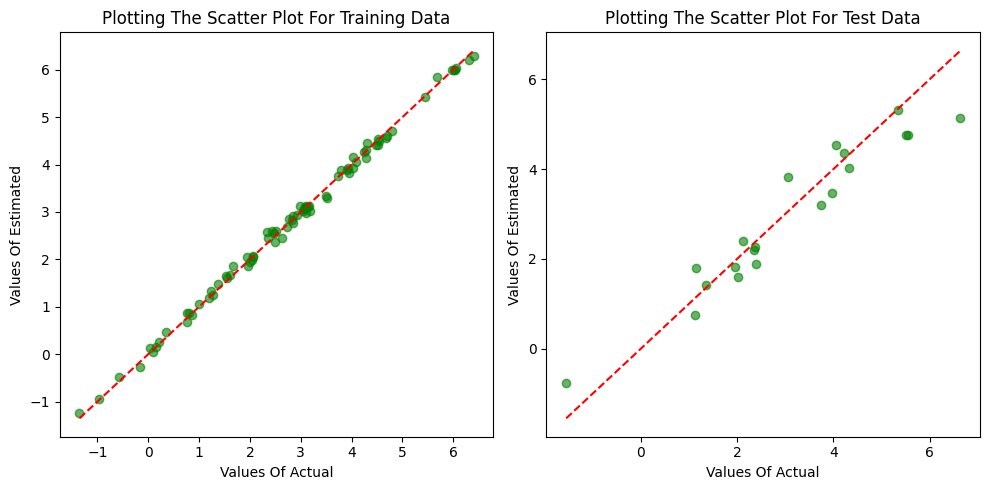

In [7]:
model.scatter_train_test(train_x, train_y, test_x, test_y)


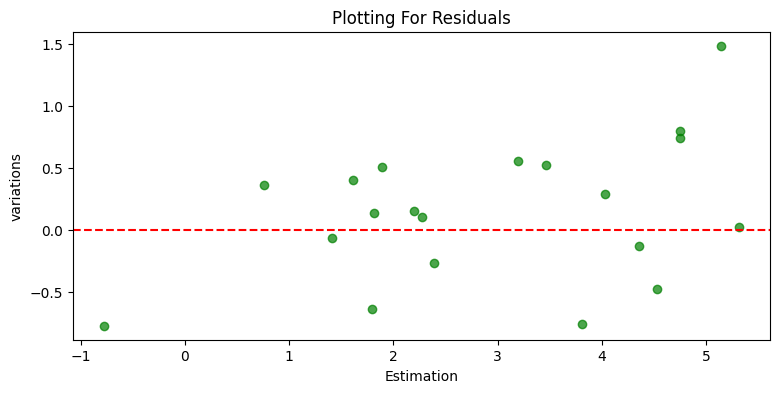

In [8]:
# Plot The Residuals
model.showing_residuals(test_x, test_y)

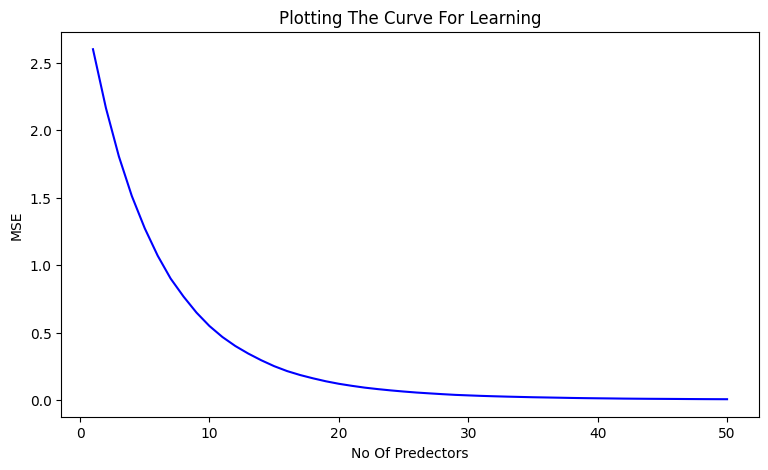

In [9]:
# Plot The Learn Curve
model.showing_learn_curve()

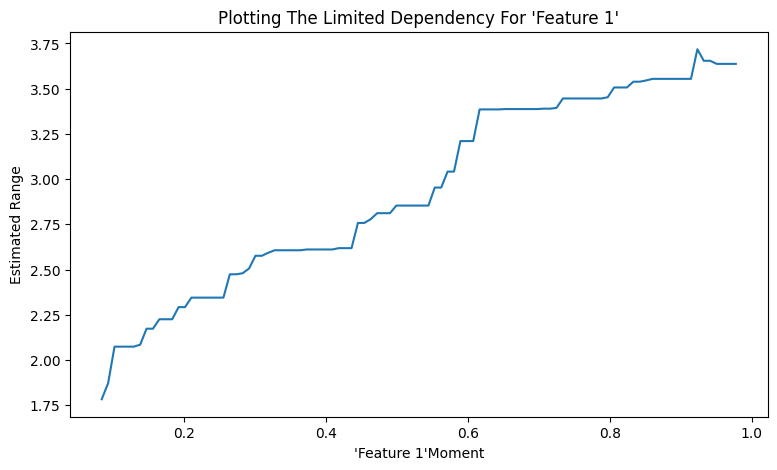

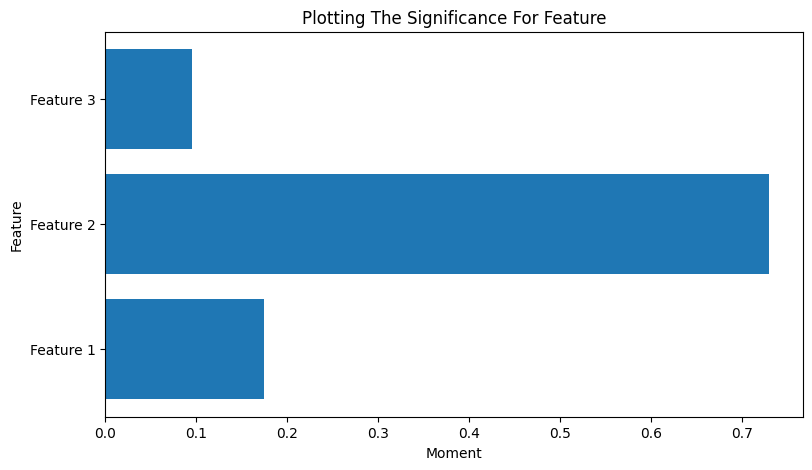

In [10]:
# Plot The Feature
model.showing_limited_dependency(test_x, strong_matches=0, noam="Feature 1")
noams = [f"Feature {i+1}" for i in range(X.shape[1])]
model.showing_feature_noams(noams)